In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

## 1. Data Collection

In [2]:
now = datetime.now()
start= datetime(now.year-10, now.month, now.day)
end= now
ticker= 'AAPL'
df= yf.download(ticker, start, end)
df

C:\Users\Gowthan\AppData\Local\Temp\ipykernel_21484\1286995422.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df= yf.download(ticker, start, end)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-08-13,25.877153,26.158060,25.740071,26.077159,194143200
2015-08-14,26.059175,26.137829,25.620961,25.690626,171718000
2015-08-17,26.328848,26.438963,25.955803,26.077155,163538800
2015-08-18,26.180531,26.391773,26.070415,26.164800,138242800
2015-08-19,25.845686,26.185020,25.771526,26.090636,193146000
...,...,...,...,...,...
2025-08-06,213.008255,215.135845,205.356935,205.396898,108483100
2025-08-07,219.780563,220.599641,216.334477,218.631873,90224800


In [3]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-08-13,25.877153,26.158060,25.740071,26.077159,194143200
2015-08-14,26.059175,26.137829,25.620961,25.690626,171718000
2015-08-17,26.328848,26.438963,25.955803,26.077155,163538800
2015-08-18,26.180531,26.391773,26.070415,26.164800,138242800
2015-08-19,25.845686,26.185020,25.771526,26.090636,193146000


In [4]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-08-06,213.008255,215.135845,205.356935,205.396898,108483100
2025-08-07,219.780563,220.599641,216.334477,218.631873,90224800
2025-08-08,229.090012,230.738135,219.001455,220.579666,113854000
2025-08-11,227.179993,229.559998,224.759995,227.919998,61806100
2025-08-12,229.649994,230.800003,227.070007,228.009995,55626200


## 2. Data Exploration & Visualization

In [5]:
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-08-13,25.877153,26.158060,25.740071,26.077159,194143200
2015-08-14,26.059175,26.137829,25.620961,25.690626,171718000
2015-08-17,26.328848,26.438963,25.955803,26.077155,163538800
2015-08-18,26.180531,26.391773,26.070415,26.164800,138242800
2015-08-19,25.845686,26.185020,25.771526,26.090636,193146000
...,...,...,...,...,...
2025-08-06,213.008255,215.135845,205.356935,205.396898,108483100
2025-08-07,219.780563,220.599641,216.334477,218.631873,90224800


In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
df.shape

(2514, 5)

In [8]:
df.isna().sum()

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

In [9]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,2514.000000,2514.000000,2514.000000,2514.000000,2.514000e+03
mean,105.347095,106.406036,104.177922,105.244901,1.077876e+08
std,69.292263,69.973723,68.526148,69.214378,6.236532e+07
min,20.624052,20.927676,20.425438,20.546426,2.323470e+07
25%,39.748956,40.233620,39.482200,39.878173,6.563048e+07
50%,106.140541,108.125647,104.746310,106.167598,9.321070e+07
75%,166.443245,168.068093,164.936208,166.651319,1.307354e+08
max,258.103729,259.179926,256.718662,257.276679,6.488252e+08


In [10]:
df.dtypes

Price   Ticker
Close   AAPL      float64
High    AAPL      float64
Low     AAPL      float64
Open    AAPL      float64
Volume  AAPL        int64
dtype: object

In [11]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-08-13,25.877153,26.158060,25.740071,26.077159,194143200
2015-08-14,26.059175,26.137829,25.620961,25.690626,171718000
2015-08-17,26.328848,26.438963,25.955803,26.077155,163538800
2015-08-18,26.180531,26.391773,26.070415,26.164800,138242800
2015-08-19,25.845686,26.185020,25.771526,26.090636,193146000


In [12]:
df= df.reset_index()

In [13]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-08-13,25.877153,26.158060,25.740071,26.077159,194143200
1,2015-08-14,26.059175,26.137829,25.620961,25.690626,171718000
2,2015-08-17,26.328848,26.438963,25.955803,26.077155,163538800
3,2015-08-18,26.180531,26.391773,26.070415,26.164800,138242800
4,2015-08-19,25.845686,26.185020,25.771526,26.090636,193146000


Text(0, 0.5, 'Close price')

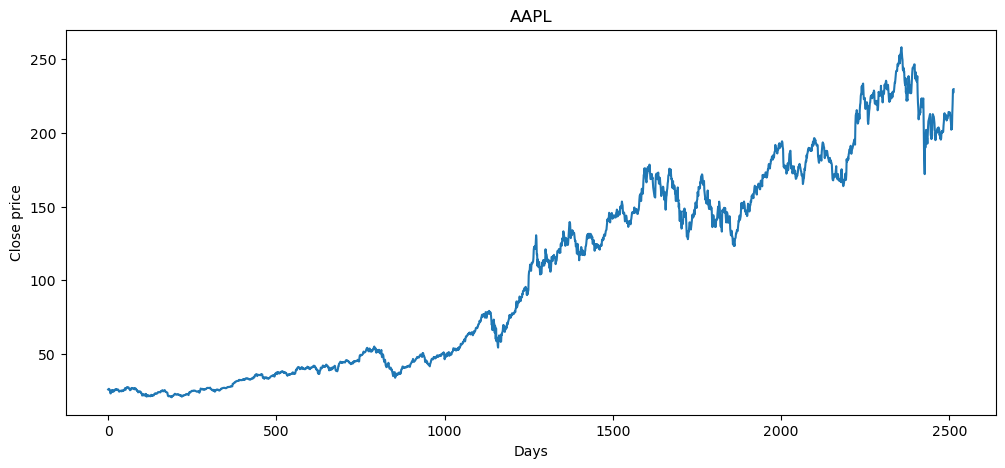

In [14]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.title(ticker)
plt.xlabel('Days')
plt.ylabel('Close price')

## 3. Feature Engineering

In [15]:
temp_df=[10, 20, 30, 40, 50, 60, 70,80, 90, 100]
print(sum(temp_df[2:7])/5)

50.0


In [16]:
df1 = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
df1

,0
0,10
1,20
2,30
3,40
4,50
5,60
6,70
7,80
8,90
9,100


In [17]:
df1['MA_5'] = df1.rolling(5).mean()
df1

,0,MA_5
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


### 100 days Moving Average

In [18]:
df['MA_100'] = df.Close.rolling(100).mean()
df.head()

Price,Date,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2015-08-13,25.877153,26.158060,25.740071,26.077159,194143200,NaN
1,2015-08-14,26.059175,26.137829,25.620961,25.690626,171718000,NaN
2,2015-08-17,26.328848,26.438963,25.955803,26.077155,163538800,NaN
3,2015-08-18,26.180531,26.391773,26.070415,26.164800,138242800,NaN
4,2015-08-19,25.845686,26.185020,25.771526,26.090636,193146000,NaN


In [19]:
df.head(103)

Price,Date,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2015-08-13,25.877153,26.158060,25.740071,26.077159,194143200,NaN
1,2015-08-14,26.059175,26.137829,25.620961,25.690626,171718000,NaN
2,2015-08-17,26.328848,26.438963,25.955803,26.077155,163538800,NaN
3,2015-08-18,26.180531,26.391773,26.070415,26.164800,138242800,NaN
4,2015-08-19,25.845686,26.185020,25.771526,26.090636,193146000,NaN
...,...,...,...,...,...,...,...
98,2016-01-04,23.776182,23.780697,23.020129,23.157799,270597600,NaN
99,2016-01-05,23.180361,23.889019,23.112656,23.866451,223164000,25.541504
100,2016-01-06,22.726732,23.103632,22.539413,22.695136,273829600,25.510000


Text(0, 0.5, 'Close price')

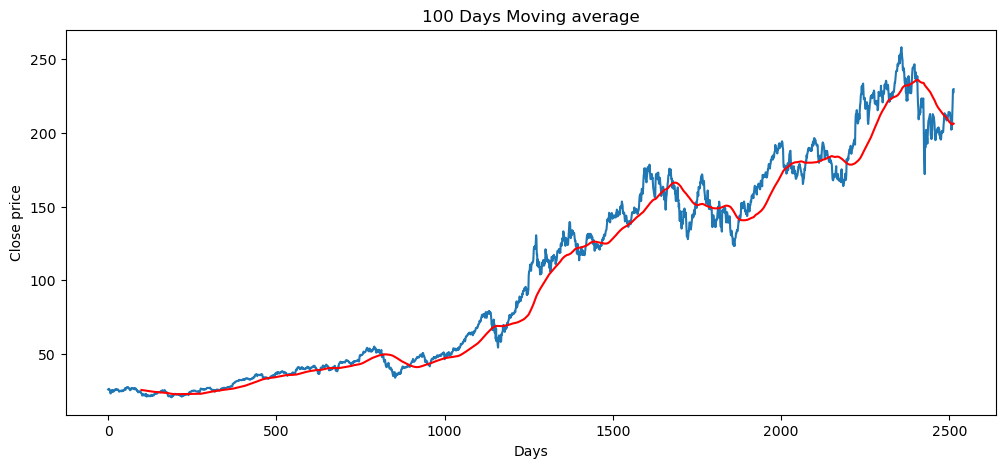

In [20]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(df['MA_100'], 'r');
plt.title('100 Days Moving average')
plt.xlabel('Days')
plt.ylabel('Close price')

### 200 days Moving Average

In [21]:
df['MA_200'] = df.Close.rolling(200).mean()
df.head(209)

Price,Date,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,2015-08-13,25.877153,26.158060,25.740071,26.077159,194143200,NaN,NaN
1,2015-08-14,26.059175,26.137829,25.620961,25.690626,171718000,NaN,NaN
2,2015-08-17,26.328848,26.438963,25.955803,26.077155,163538800,NaN,NaN
3,2015-08-18,26.180531,26.391773,26.070415,26.164800,138242800,NaN,NaN
4,2015-08-19,25.845686,26.185020,25.771526,26.090636,193146000,NaN,NaN
...,...,...,...,...,...,...,...,...
204,2016-06-06,22.516611,23.260849,22.270055,22.370503,93170000,22.718374,24.034350
205,2016-06-07,22.607922,22.799689,22.591941,22.658146,89638000,22.724656,24.020813
206,2016-06-08,22.587379,22.728920,22.528023,22.605642,83392400,22.725926,24.014915


Text(0, 0.5, 'Close price')

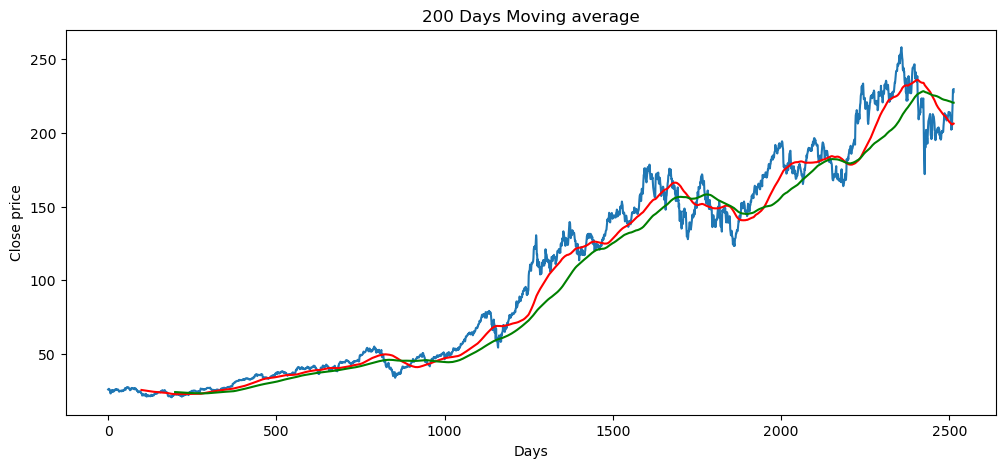

In [22]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(df['MA_100'], 'r');
plt.plot(df['MA_200'], 'g');
plt.title('200 Days Moving average')
plt.xlabel('Days')
plt.ylabel('Close price')

In [23]:
df

Price,Date,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,2015-08-13,25.877153,26.158060,25.740071,26.077159,194143200,NaN,NaN
1,2015-08-14,26.059175,26.137829,25.620961,25.690626,171718000,NaN,NaN
2,2015-08-17,26.328848,26.438963,25.955803,26.077155,163538800,NaN,NaN
3,2015-08-18,26.180531,26.391773,26.070415,26.164800,138242800,NaN,NaN
4,2015-08-19,25.845686,26.185020,25.771526,26.090636,193146000,NaN,NaN
...,...,...,...,...,...,...,...,...
2509,2025-08-06,213.008255,215.135845,205.356935,205.396898,108483100,205.744943,220.613600
2510,2025-08-07,219.780563,220.599641,216.334477,218.631873,90224800,205.813062,220.557130
2511,2025-08-08,229.090012,230.738135,219.001455,220.579666,113854000,205.969187,220.533023


### Calculating % changed in each trading session

In [24]:
df['Percentage Changed']= df.Close.pct_change()
df[['Close', 'Percentage Changed']]

Price,Close,Percentage Changed
Ticker,AAPL,
0,25.877153,NaN
1,26.059175,0.007034
2,26.328848,0.010348
3,26.180531,-0.005633
4,25.845686,-0.012790
...,...,...
2509,213.008255,0.050907
2510,219.780563,0.031794
2511,229.090012,0.042358


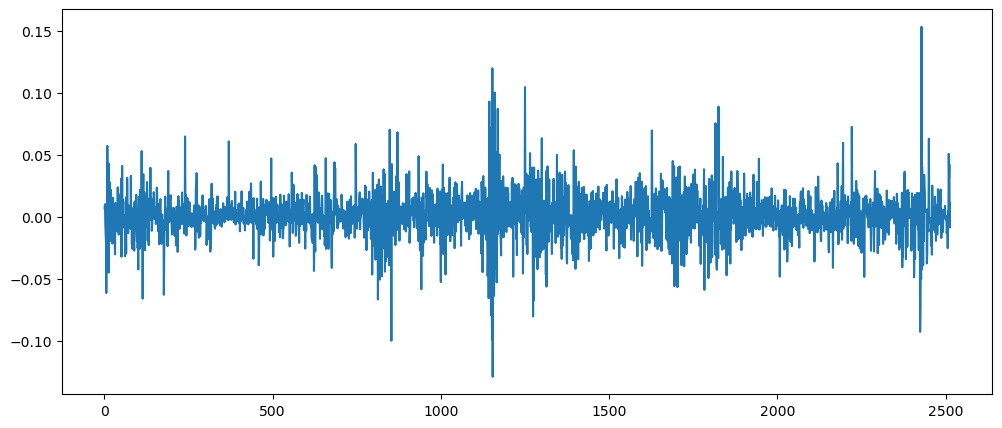

In [25]:
plt.figure(figsize=(12,5))
plt.plot(df['Percentage Changed'])

## 4. Data Preprocessing

In [26]:
df.shape

(2514, 9)

In [28]:
# splitting data into Training and Testing datasets
data_training= pd.DataFrame(df.Close[0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df.Close[int(len(df)*0.7): int(len(df))])

print(data_training)
print(data_testing)

Ticker        AAPL
0        25.877153
1        26.059175
2        26.328848
3        26.180531
4        25.845686
...            ...
1754    157.304901
1755    163.321472
1756    163.006866
1757    162.780457
1758    162.307877

[1759 rows x 1 columns]
Ticker        AAPL
1759    162.357117
1760    166.610016
1761    165.871643
1762    169.425552
1763    170.498596
...            ...
2509    213.008255
2510    219.780563
2511    229.090012
2512    227.179993
2513    229.649994

[755 rows x 1 columns]


In [32]:
type(data_training)

pandas.core.frame.DataFrame

In [29]:
data_training

Ticker,AAPL
0,25.877153
1,26.059175
2,26.328848
3,26.180531
4,25.845686
...,...
1754,157.304901
1755,163.321472
1756,163.006866
1757,162.780457


In [30]:
data_testing

Ticker,AAPL
1759,162.357117
1760,166.610016
1761,165.871643
1762,169.425552
1763,170.498596
...,...
2509,213.008255
2510,219.780563
2511,229.090012
2512,227.179993


In [ ]:
# scaling down the data between 0 and 1

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [33]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.03328559],
       [0.03443895],
       [0.0361477 ],
       ...,
       [0.90219021],
       [0.9007556 ],
       [0.89776116]], shape=(1759, 1))

In [34]:
type(data_training_array)

numpy.ndarray

In [35]:
data_training_array.shape

(1759, 1)

## 5. Sequence Creation

In [37]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train, y_train= np.array(x_train), np.array(y_train)

In [38]:
x_train

array([[[0.03328559],
        [0.03443895],
        [0.0361477 ],
        ...,
        [0.01984434],
        [0.01997306],
        [0.01619772]],

       [[0.03443895],
        [0.0361477 ],
        [0.0352079 ],
        ...,
        [0.01997306],
        [0.01619772],
        [0.01332336]],

       [[0.0361477 ],
        [0.0352079 ],
        [0.03308621],
        ...,
        [0.01619772],
        [0.01332336],
        [0.00724572]],

       ...,

       [[0.83175611],
        [0.80619144],
        [0.83399515],
        ...,
        [0.87540432],
        [0.86606045],
        [0.90418367]],

       [[0.80619144],
        [0.83399515],
        [0.86198584],
        ...,
        [0.86606045],
        [0.90418367],
        [0.90219021]],

       [[0.83399515],
        [0.86198584],
        [0.8683925 ],
        ...,
        [0.90418367],
        [0.90219021],
        [0.9007556 ]]], shape=(1659, 100, 1))

In [39]:
x_train.ndim

3

In [40]:
y_train.ndim

1

In [41]:
y_train.shape

(1659,)

## 6. Model Building

In [46]:
import tensorflow as tf
print(tf.__version__)

2.20.0-rc0


In [48]:
#Ml Model
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input

In [49]:
model = Sequential()#this accepts sequence of data


model.add(Input(shape=(100, 1)))#100 previous data and 1 closing features
model.add(LSTM(units=128, activation='tanh', return_sequences=True))#want LSTM to have 128 neurons
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(1))

## 7. Model Training

In [50]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)#we are telling model to go through this x_train and y_train for 50 times

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 14s 136ms/step - loss: 0.0104
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 134ms/step - loss: 5.7783e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 135ms/step - loss: 5.8843e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 136ms/step - loss: 5.2082e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 136ms/step - loss: 5.3998e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 133ms/step - loss: 5.4704e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 132ms/step - loss: 4.8938e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 134ms/step - loss: 4.7132e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 135ms/step - loss: 4.2042e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 133ms/step - loss: 4.4216e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 133ms/step - loss: 3.8556e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 132ms/step - loss: 4.4406e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 135ms/step - loss: 3.8202e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 133ms/step - loss: 4.1005e-04
Epoc

In [51]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                     ┃ Output Shape            ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                      │ (None, 100, 128)        │        66,560 │
├──────────────────────────────────┼─────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                    │ (None, 64)              │        49,408 │
├──────────────────────────────────┼─────────────────────────┼───────────────┤
│ dense (Dense)                    │ (None, 25)              │         1,625 │
├──────────────────────────────────┼─────────────────────────┼───────────────┤
│ dense_1 (Dense)                  │ (None, 1)               │            26 │
└──────────────────────────────────┴─────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [52]:
# Save the trained model
model.save('stock_prediction_model.keras')

## 8. Preparing Test Data

In [55]:
data_training.tail(100)

Ticker,AAPL
1659,156.661850
1660,157.672943
1661,160.971298
1662,162.345612
1663,165.722504
...,...
1754,157.304901
1755,163.321472
1756,163.006866
1757,162.780457


In [53]:
data_testing

Ticker,AAPL
1759,162.357117
1760,166.610016
1761,165.871643
1762,169.425552
1763,170.498596
...,...
2509,213.008255
2510,219.780563
2511,229.090012
2512,227.179993


In [56]:
past_100_days = data_training.tail(100)

In [57]:
past_100_days

Ticker,AAPL
1659,156.661850
1660,157.672943
1661,160.971298
1662,162.345612
1663,165.722504
...,...
1754,157.304901
1755,163.321472
1756,163.006866
1757,162.780457


In [58]:
final_df= pd.concat([past_100_days, data_testing], ignore_index=True)
final_df

Ticker,AAPL
0,156.661850
1,157.672943
2,160.971298
3,162.345612
4,165.722504
...,...
850,213.008255
851,219.780563
852,229.090012
853,227.179993


In [59]:
input_data = scaler.fit_transform(final_df)
input_data

array([[2.47588807e-01],
       [2.55088252e-01],
       [2.79552697e-01],
       [2.89746207e-01],
       [3.14793174e-01],
       [3.24913911e-01],
       [3.53018919e-01],
       [3.57751640e-01],
       [3.64158927e-01],
       [3.88623259e-01],
       [3.79958771e-01],
       [3.56950574e-01],
       [3.54766258e-01],
       [3.84837151e-01],
       [3.60227047e-01],
       [3.36708987e-01],
       [3.38966188e-01],
       [3.24039958e-01],
       [2.92440271e-01],
       [3.06347230e-01],
       [3.26297386e-01],
       [2.89090912e-01],
       [2.87489006e-01],
       [3.04453893e-01],
       [3.03216189e-01],
       [2.97318538e-01],
       [2.63607195e-01],
       [2.71543617e-01],
       [2.27274448e-01],
       [2.25600108e-01],
       [2.77077178e-01],
       [2.33463191e-01],
       [2.35720845e-01],
       [2.46787741e-01],
       [2.94405929e-01],
       [2.27056356e-01],
       [2.32452068e-01],
       [1.94388845e-01],
       [2.12253715e-01],
       [1.53846820e-01],


In [60]:
input_data.shape

(855, 1)

In [61]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [62]:
x_test, y_test =np.array(x_test), np.array(y_test)

In [65]:
x_test[0].shape

(100, 1)

## 9. Making Predictions

In [66]:
y_predicted=model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step


In [67]:
y_predicted

array([[0.28335205],
       [0.2823625 ],
       [0.29629546],
       [0.3041549 ],
       [0.31966776],
       [0.33291128],
       [0.3385932 ],
       [0.34541133],
       [0.34749264],
       [0.33837834],
       [0.31842408],
       [0.30599517],
       [0.30233705],
       [0.3108904 ],
       [0.29604474],
       [0.27718028],
       [0.2586389 ],
       [0.2435343 ],
       [0.23825113],
       [0.23069239],
       [0.22220759],
       [0.22137377],
       [0.21784388],
       [0.22380197],
       [0.24753912],
       [0.235032  ],
       [0.22496971],
       [0.21071976],
       [0.19693205],
       [0.20002481],
       [0.21262962],
       [0.21278375],
       [0.20731224],
       [0.19612595],
       [0.18933022],
       [0.18903954],
       [0.1848582 ],
       [0.16124023],
       [0.13199587],
       [0.12373578],
       [0.13269936],
       [0.1435337 ],
       [0.14820175],
       [0.13536273],
       [0.12400179],
       [0.11339268],
       [0.10521049],
       [0.112

In [68]:
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1,1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1,1)).flatten()

In [69]:
y_predicted

array([161.48354 , 161.35013 , 163.22859 , 164.28822 , 166.3797  ,
       168.16524 , 168.93127 , 169.85052 , 170.13112 , 168.90231 ,
       166.21202 , 164.53633 , 164.04314 , 165.19632 , 163.1948  ,
       160.65144 , 158.15164 , 156.1152  , 155.40292 , 154.38383 ,
       153.2399  , 153.12747 , 152.65158 , 153.45485 , 156.65515 ,
       154.96892 , 153.61229 , 151.69107 , 149.83218 , 150.24915 ,
       151.94856 , 151.96935 , 151.23167 , 149.7235  , 148.8073  ,
       148.7681  , 148.20436 , 145.02013 , 141.07733 , 139.9637  ,
       141.17218 , 142.6329  , 143.26225 , 141.53127 , 139.99956 ,
       138.5692  , 137.46606 , 138.39832 , 137.95146 , 138.6784  ,
       139.88889 , 140.80835 , 141.1317  , 142.5405  , 144.46594 ,
       146.84848 , 147.25755 , 145.33234 , 147.75131 , 149.29706 ,
       148.99402 , 146.28886 , 141.99487 , 139.02126 , 137.65334 ,
       137.37837 , 135.96043 , 138.7673  , 142.72495 , 145.008   ,
       146.58405 , 146.83258 , 147.35553 , 147.92476 , 147.024

In [70]:
y_test

array([162.3571167 , 166.61001587, 165.87164307, 169.42555237,
       170.49859619, 170.34107971, 171.83746338, 171.44369507,
       168.85453796, 164.96595764, 164.63121033, 164.92654419,
       167.38771057, 161.07730103, 158.87213135, 156.44050598,
       154.77677917, 155.50531006, 153.38870239, 152.12858582,
       153.53636169, 152.05969238, 154.92443848, 160.89027405,
       151.4493103 , 152.8964386 , 150.00213623, 148.35809326,
       152.07933044, 154.46174622, 151.33117676, 150.36639404,
       148.09228516, 148.42700195, 149.40164185, 147.51148987,
       140.26582336, 136.05233765, 140.23629761, 143.82958984,
       144.12490845, 143.16999817, 137.91297913, 138.237854  ,
       136.82023621, 136.19018555, 140.76792908, 136.22955322,
       140.19692993, 141.51612854, 141.62440491, 141.16168213,
       144.98141479, 147.1275177 , 149.97261047, 147.02911377,
       142.54978943, 153.3197937 , 150.95704651, 148.30885315,
       142.77624512, 136.7217865 , 136.45553589, 136.98

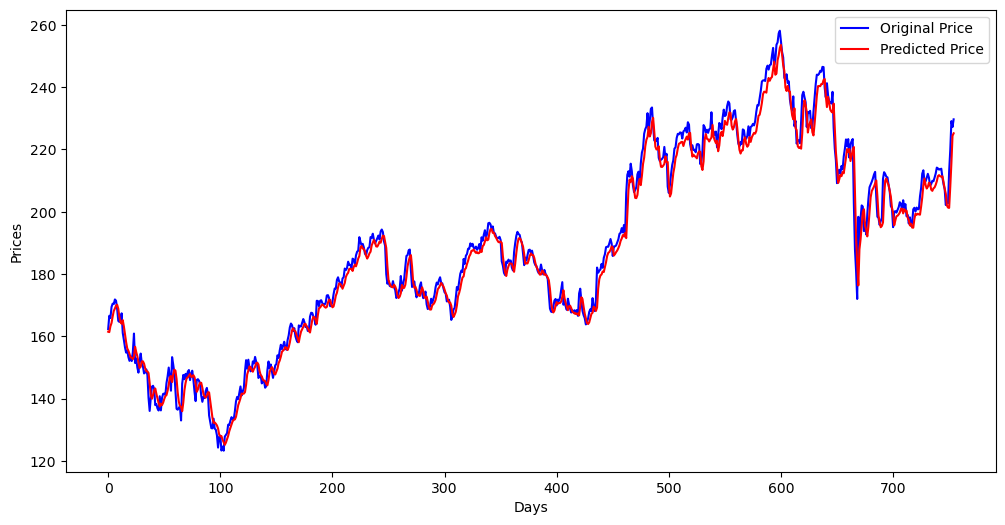

In [73]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label='Original Price' )
plt.plot(y_predicted,'r', label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Prices')
plt.legend()

(140.0, 220.0)

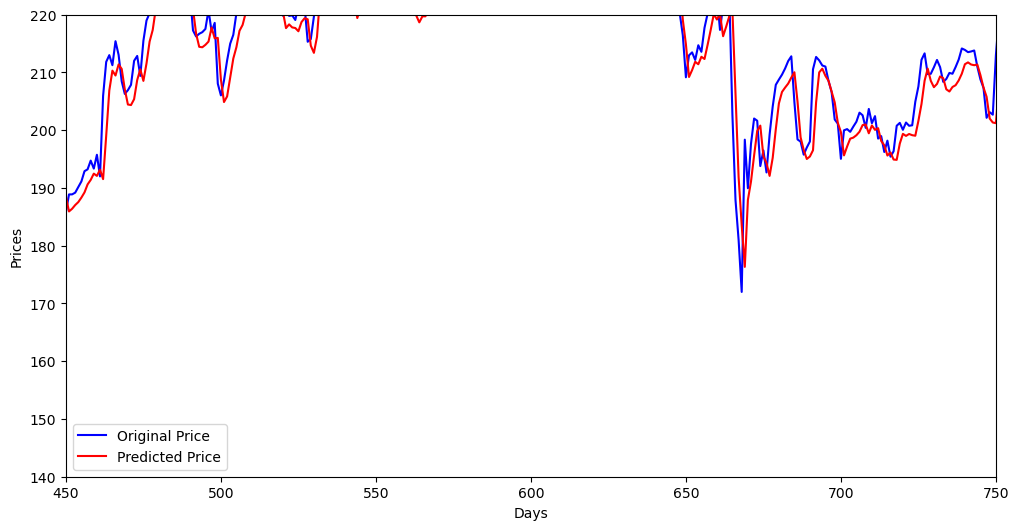

In [72]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label='Original Price' )
plt.plot(y_predicted,'r', label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Prices')
plt.legend()
plt.xlim(450, 750)
plt.ylim(140, 220)

## 10. Model Evaluation

In [79]:
# Mean squared Error(MSE)
from sklearn.metrics import mean_squared_error, r2_score

In [76]:
mse = mean_squared_error(y_test, y_predicted)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 15.933945811070604


In [77]:
# Root mean Squared Error(RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE):{rmse}')

Root Mean Squared Error (RMSE):3.991734686958867


In [80]:
#R-Squared
r2= r2_score(y_test, y_predicted)
print(f"R-Squared: {r2}")

R-Squared: 0.983530913425561
